Import necessary packages.

In [1692]:
from sympy import *
from sympy.plotting import plot
import matplotlib.pyplot as plt

Declare variables we are going to use as 'symbols'. We will add more along the way.

In [1648]:
p, F, q, r = symbols('p F q r')

## Defining the drug research function


#### A note on this jupyter notebook:

These graphs essentially serve the same function as isocost and isoquant curves. Since we are not producing a quantity of goods, and rather achieving a utility standard I called the equivalent of the isoquant curve the 'isovalue curve' to distinguish the two. Since it is also not an indifference curve I did not want to call it a 'isoutility curve' because I thought that might be confusing.

Defining the research function:

In [1652]:
a, b = symbols('a b')
# Note: in sympy syntax: use double star ** for power
u = ((p*F*q)**a)/((r*p*q)**b) 

# show the defined function
u

Calculate marginal value of production and investment costs

In [1655]:
# Note: in sympy 
mpp = u.diff(p)
mpp.simplify()

In [1657]:
mpF = u.diff(F)
mpF.simplify()

In [1659]:
mrts = simplify(-mpp / mpF)
mrts

## Visualize the research function in 3D

In [1698]:
# import plot3d function from sympy
from sympy.plotting import plot3d
# enable package matplotlib, and its notebook model to display the plot in a plot window 
# (allowing rotation of the 3d plot) 
%matplotlib inline
import matplotlib.pyplot as plt

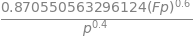

In [1708]:
# set output parameters for plotting
uplot = u.subs([(a, 0.6), (b, 0.4), (q, 2), (r, 2)])
uplot

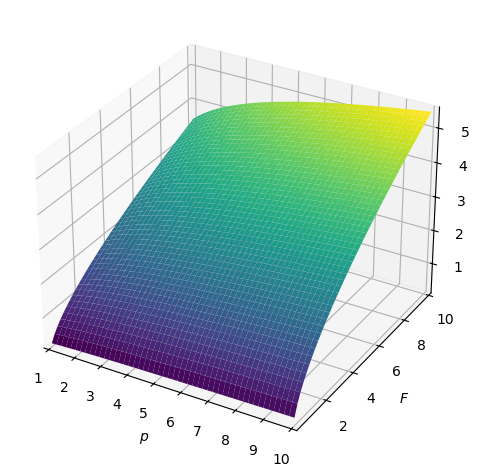

In [1710]:
#This plot can be a bit finnicky, it should work but sometimes it throws an error "Ipython not defined"
#If this happens try changing some of the parameters around and it should work, if not try reloading the page.
plot3d(uplot, (p,1,10), (F,0.1,10))

The results from this graph are quite promising! Here is my interpretation of this utility hill:

When $p_{d}$ is low, and F is low utility achieved is low, minimum outcome
When $p_{d}$ is low and F is high, utility achieved is high, but not the maximum
When $p_{d}$ is high and F is low, utility achieved is low, but not the minimum
When both $p_{d}$ and F are high, the maximum utility is achieved.

These results make sense, given that they push us to value F more than $p_{d}$ when making choices for the rare drug company. With a cost constraint, this will likely result in the firm selecting higher R\&D investments and low $p_{d}$ -- See final graph

Plot the isovalue curve that has output level of 3

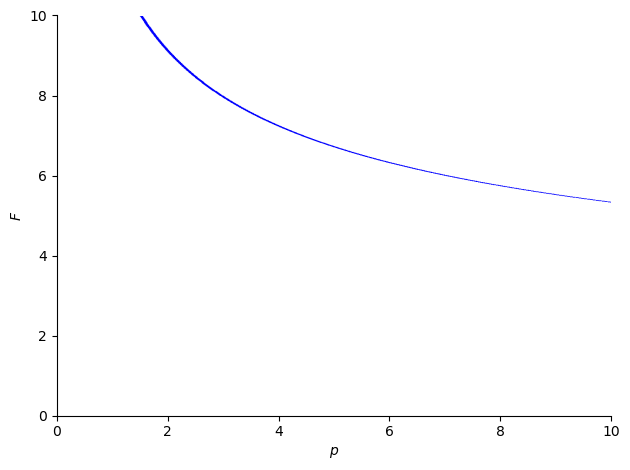

In [1570]:
# set matplotlib to inline model for faster display (don't need the interactive window for 2d plots)
%matplotlib inline
# plot an implicit function of F in terms of P defined by: q(L,K) = 3, this one can also be a bit finnicky and throw different results
plot_implicit(Eq(uplot, 3), (p,0,10), (F,0,10), xlim=(0,10), ylim=(0,10))

## Derive the expression for the isovalue curve

In [1572]:
# define a new symbol ubar
qbar = symbols('qbar')
# explicitly solve for the isovalue curve: F as a function of qbar and p
isovalue_sol = solve(Eq(u, qbar), F)
# show the expression of the isovalue curve
isovalue_sol

Nice! Now we call this element (the solution we want): isovalue

In [1574]:
isovalue = isovalue_sol[0]
isovalue

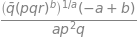

In [1575]:
isovalue.diff(p).simplify()

## Plot isovalue curves

Let's plot multiple isovalue curves

In [1578]:
# set production function parameters for plotting
isovalue_plot = isovalue.subs([(a, 2), (b,1), (q, 1), (r, 2)])
isovalue_plot

In [1579]:
isovalue_plot1 = plot(isovalue_plot.subs(qbar, 1), xlim=[0,10], ylim=[0,10], xlabel="$p_{d}$", ylabel="$F$", show=False)
isovalue_plot2 = plot(isovalue_plot.subs(qbar, 2), xlim=[0,10], ylim=[0,10], xlabel="$p_{d}$", ylabel="$F$", show=False)
isovalue_plot3 = plot(isovalue_plot.subs(qbar, 3), xlim=[0,10], ylim=[0,10], xlabel="$p_{d}$", ylabel="$F$", show=False)
isovalue_plot4 = plot(isovalue_plot.subs(qbar, 4), xlim=[0,10], ylim=[0,10], xlabel="$p_{d}$", ylabel="$F$", show=False)
isovalue_plot5 = plot(isovalue_plot.subs(qbar, 5), xlim=[0,10], ylim=[0,10], xlabel="$p_{d}$", ylabel="$F$", show=False)

Now, let's plot all 5 indifference curves in one graph!

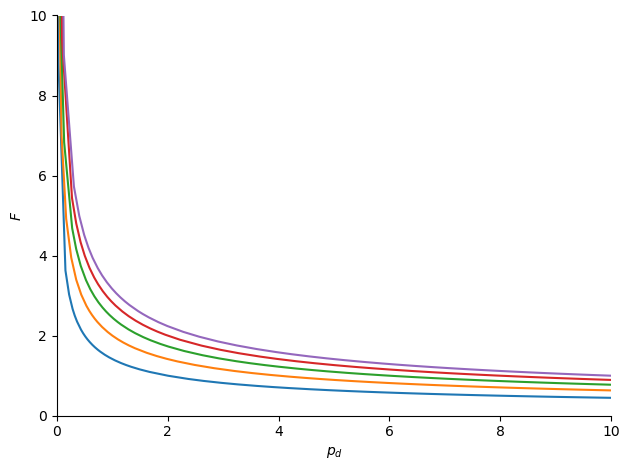

In [1581]:
isovalue_plot_combo = isovalue_plot1
isovalue_plot_combo.extend(isovalue_plot2)
isovalue_plot_combo.extend(isovalue_plot3)
isovalue_plot_combo.extend(isovalue_plot4)
isovalue_plot_combo.extend(isovalue_plot5)
isovalue_plot_combo.show()

### Plotting total yield from investment, average yield from investment, and marginal yield from investment

In [1583]:
#Imposing specific values for plotting 
#Creating expressions for plotting
tyi_SR_plot = u.subs([(a,0.6),(b,0.4),(p,5),(r,2.5),(q,1) ])
# calculate MP of labor
myi_SR_plot = tyi_SR_plot.diff(F)
# calculate AP of labor
ayi_SR_plot = tyi_SR_plot/F

<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power
<string>:1: RuntimeWarning: invalid value encountered in scalar power


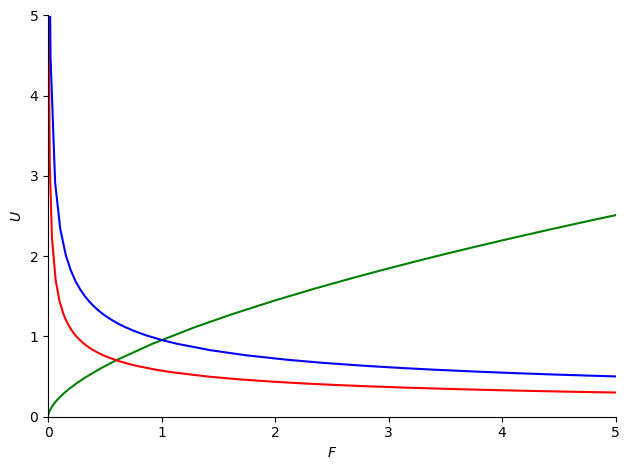

In [1584]:
#Creating the plots
combine_plot = plot(tyi_SR_plot, xlim=[0,5], ylim=[0,5], ylabel="$U$",show = False,)
combine_plot.extend(plot(myi_SR_plot, show = False))
combine_plot.extend(plot(ayi_SR_plot,show = False))

combine_plot[0].line_color='green'
combine_plot[1].line_color='red'
combine_plot[2].line_color='blue'


combine_plot.show()

This graph reflects the diminishing returns on R&D investment

In [1586]:
#Defining choice variables
F, p, q, Cbar= symbols(r'F p_{d} q \overline{C}', nonzero = True, positive = True)

#Defining cost 
pexpense = p*q 
fexpense = F 
expense = pexpense + fexpense

expense

In [1587]:
# Retreive the first and only element in the solution, which is our expression for the budget constraint.
isocost_sol = solve(Cbar - expense, p)
isocost_sol

In [1588]:
# Retreive the first and only element in the solution, which is our expression for the budget constraint.
isocost = isocost_sol[0]
isocost

isocost

In [1589]:
#Display the expanded isocost curve
isocost.expand()

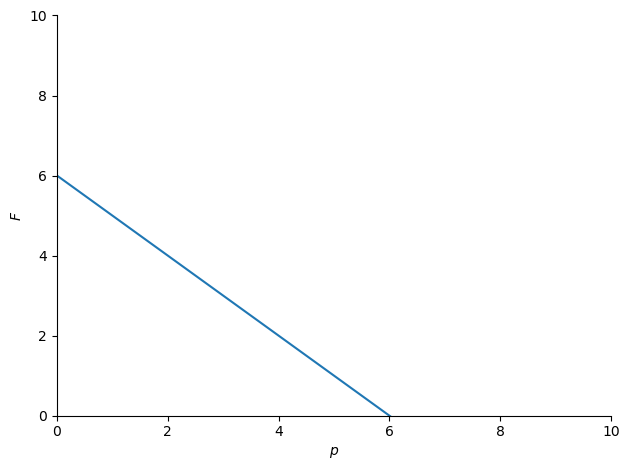

In [1590]:
#Plotting an isocost curve where we assume Cbar = 6, and q = 1

#Plotting the function
isocost_plot1 = plot(isocost.subs([(Cbar,6),(q, 1)]), xlim=[0,10], ylim=[0,10], xlabel="$p$", ylabel="$F$", show=False)
isocost_plot1.show()

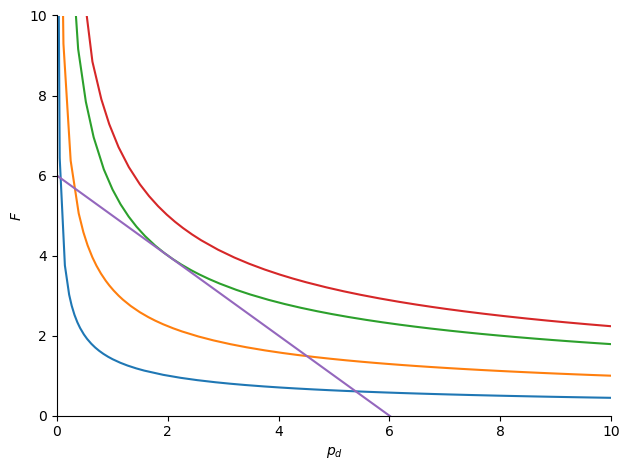

In [1592]:
isovalue_plot1 = plot(isovalue_plot.subs(qbar, 1), xlim=[0,10], ylim=[0,10], xlabel="$p_{d}$", ylabel="$F$", show=False)
isovalue_plot2 = plot(isovalue_plot.subs(qbar, 5), xlim=[0,10], ylim=[0,10], xlabel="$p_{d}$", ylabel="$F$", show=False)
isovalue_plot3 = plot(isovalue_plot.subs(qbar, 16), xlim=[0,10], ylim=[0,10], xlabel="$p_{d}$", ylabel="$F$", show=False)
isovalue_plot4 = plot(isovalue_plot.subs(qbar, 25), xlim=[0,10], ylim=[0,10], xlabel="$p_{d}$", ylabel="$F$", show=False)

isoplot = isovalue_plot1
isoplot.extend(isovalue_plot2)
isoplot.extend(isovalue_plot3)
isoplot.extend(isovalue_plot4)
isoplot.extend(isocost_plot1)
isoplot.show()

Here we can see the intuitive results that with a cost constraint, firms will choose higher amounts of R\&D expenditure than they will production cost in order to achieve the utility constraint.